In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img1 = cv2.imread("iOSScreen.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("elementoiOS.png", cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
cv2.imwrite("matches.png", img_matches)



True

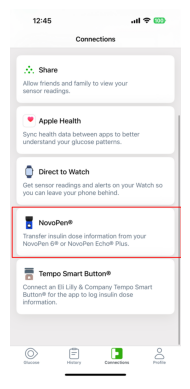

In [12]:
img = cv2.imread('iOSScreen.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
template = cv2.imread('elementoiOS.png',0)
w, h = template.shape[::-1]
 
res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
bottom_right = (min_loc[0] + w, min_loc[1] + h)

cv2.rectangle(img,min_loc, bottom_right, (0,0,255), 2)

if img is None:
    print("❌ No se pudo cargar la imagen. Verifica la ruta.")
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


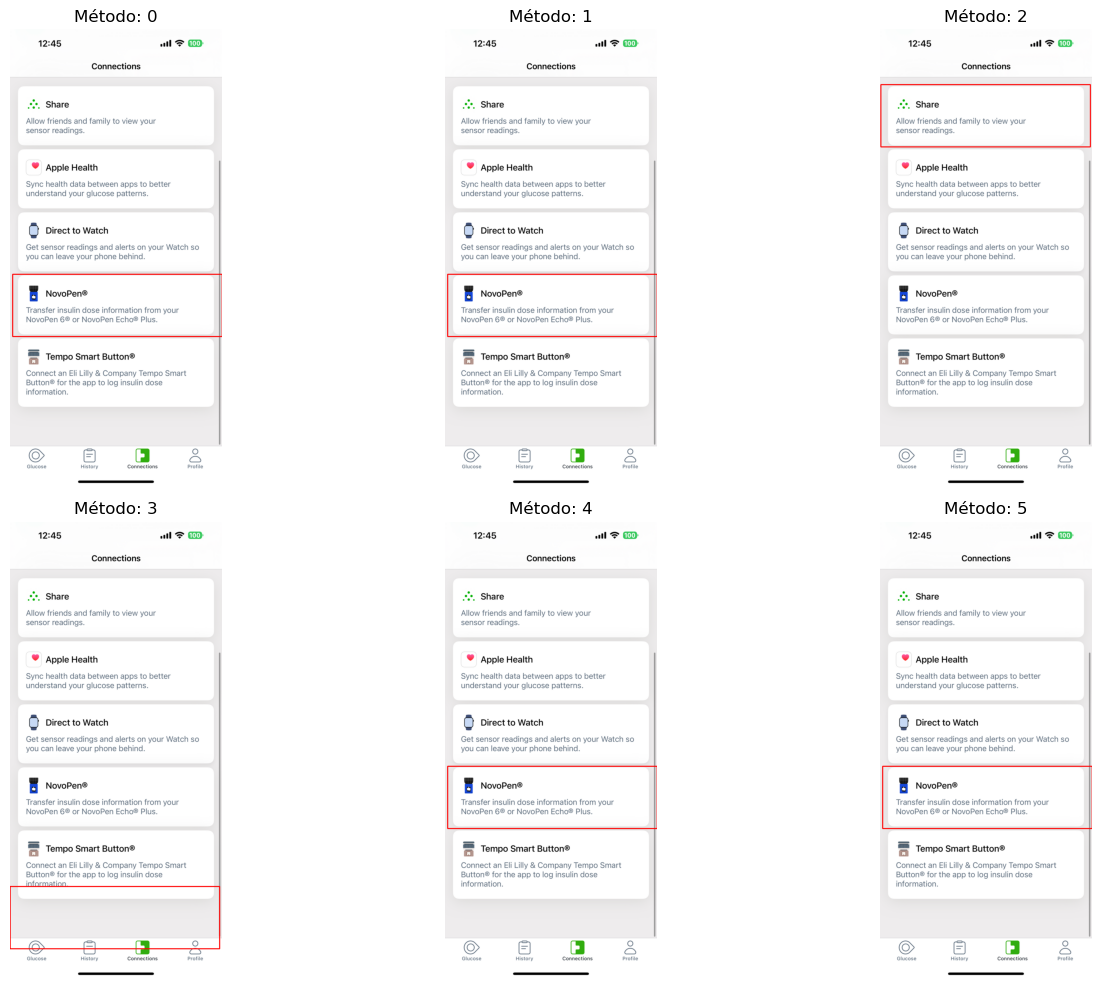

In [13]:
img = cv2.imread('iOSScreen.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('elementoiOS.png', 0)
w, h = template.shape[::-1]

# Lista de métodos de template matching
methods = [
    cv2.TM_SQDIFF,
    cv2.TM_SQDIFF_NORMED,
    cv2.TM_CCORR,
    cv2.TM_CCORR_NORMED,
    cv2.TM_CCOEFF,
    cv2.TM_CCOEFF_NORMED
]

# Mostrar resultados para cada método
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods):
    img_copy = img.copy()
    res = cv2.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Elegir la mejor ubicación según el método
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title(f'Método: {method}')
    plt.axis('off')

plt.tight_layout()
plt.show()


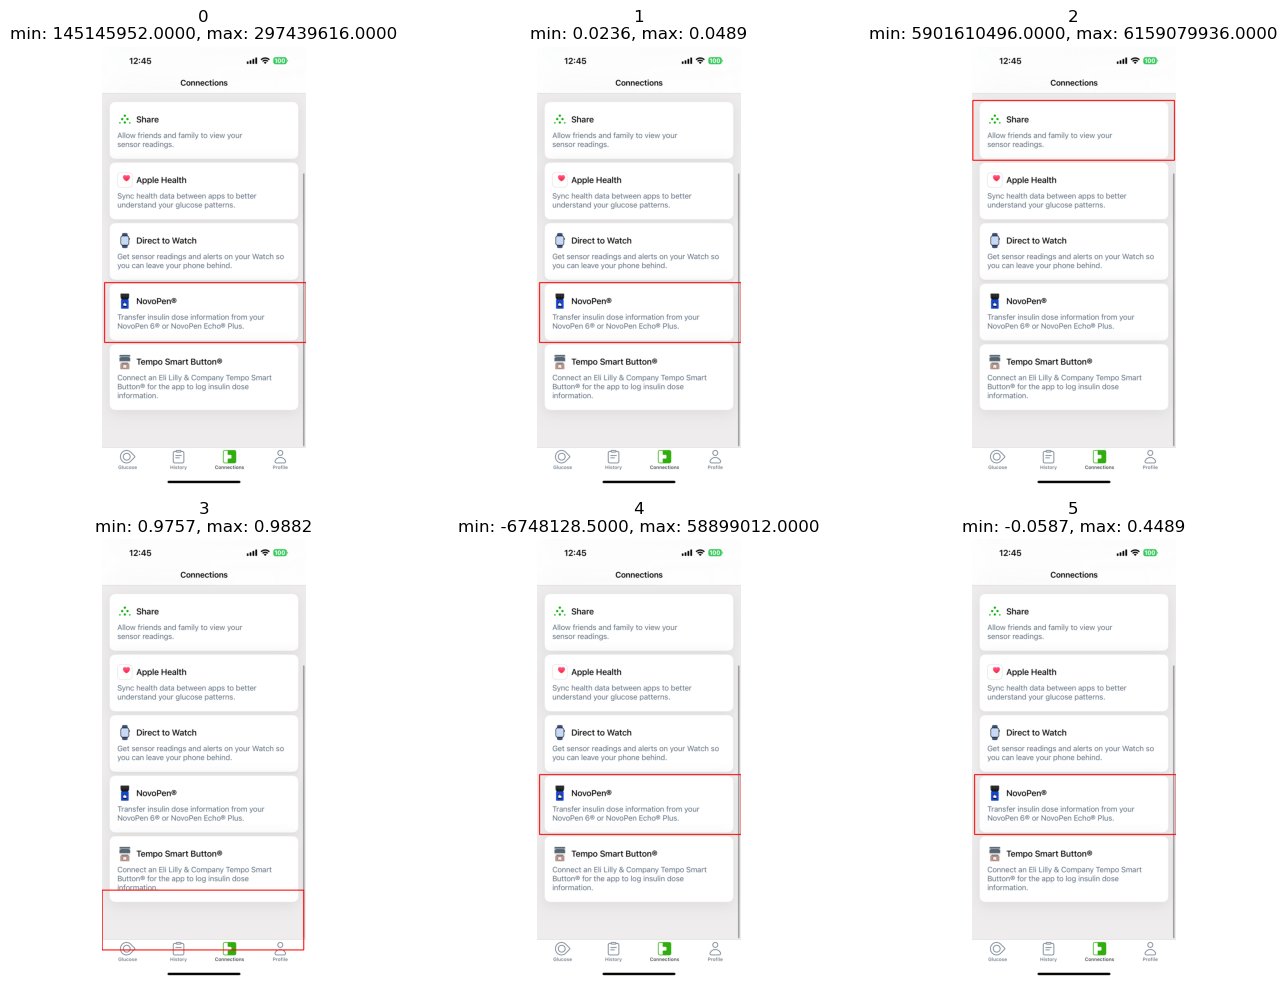

In [20]:
img = cv2.imread('iOSScreen.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('elementoiOS.png', 0)
w, h = template.shape[::-1]

# Lista de métodos de template matching
methods = [
    cv2.TM_SQDIFF,
    cv2.TM_SQDIFF_NORMED,
    cv2.TM_CCORR,
    cv2.TM_CCORR_NORMED,
    cv2.TM_CCOEFF,
    cv2.TM_CCOEFF_NORMED
]

# Mostrar resultados para cada método
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods):
    img_copy = img.copy()
    res = cv2.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Elegir la mejor ubicación según el método
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

    # Mostrar imagen
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title(f'{method}\nmin: {min_val:.4f}, max: {max_val:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()
